# Análise Estatística: Salário de Profissionais de Dados

Aqui segue um estudo sobre a base de dados "Análise Estatística: Salário de Profissionais de Dados.csv", que fiz para aplicar parte das habilidades desenvolvidas no módulo 4 da formação de Cientista de Dados da DNC. Vou iniciar importanado e exploranado inicialmente a base, verificando frequência e distribuição das categorias, estudando estatísticas descritivas, realizando comparações por país e por fim entendendo correlações e rendências.

## Importação dos dados

Vamos importar os dados da base fornecida pelo desafio. Para realizar a importação, vamos utilizar o método

```
# read_csv()
```
Do pandas. Vamos lá?


In [28]:
import pandas as pd

df = pd.read_csv('salario_profissionais_dados.csv')
df.head(5)

,work_year,country,region,experience_level,job_title,salary_in_usd,employee_residence,company_location,company_size,years_of_experience
0,2023,Spain,Europe,SE,Principal Data Scientist,85847,ES,ES,L,8
1,2023,United States of America,Americas,MI,ML Engineer,30000,US,US,S,5
2,2023,United States of America,Americas,MI,ML Engineer,25500,US,US,S,3
3,2023,Canada,Americas,SE,Data Scientist,175000,CA,CA,M,8
4,2023,Canada,Americas,SE,Data Scientist,120000,CA,CA,M,8


## Exploração inicial dos dados

Agora que carregamos a base de dados para nosso notebook, vamos realizar uma exploração inicial dos nossos dados.

O que estamos querendo entender?

````
*   Quais colunas estão disponíveis?
*   Quantas linhas existem?
*   Existem dados ausentes?
*   Quais são os tipos de variáveis?
````

Para verificar a forma dos nossos dados e descobrir a quantidade de linhas e colunas que temos vamos usar o trecho de código abaixo:

In [29]:
df.shape

(3755, 10)

Na nossa base de dados temos 3755 linhas e 10 colunas. Quais são os tipos dessas variáveis?

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   work_year            3755 non-null   int64 
 1   country              3755 non-null   object
 2   region               3755 non-null   object
 3   experience_level     3755 non-null   object
 4   job_title            3755 non-null   object
 5   salary_in_usd        3755 non-null   int64 
 6   employee_residence   3755 non-null   object
 7   company_location     3755 non-null   object
 8   company_size         3755 non-null   object
 9   years_of_experience  3755 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 293.5+ KB


Percebemos que, os tipos de dados está correto e não possuímos valores nulos, e para confirmar isso, vamos utilizar
```
df.isnull().sum()
```

In [31]:
df.isnull().sum()

,0
work_year,0
country,0
region,0
experience_level,0
job_title,0
salary_in_usd,0
employee_residence,0
company_location,0
company_size,0
years_of_experience,0


Confirmamos então que nossa base não possui valores nulos 😁

## Frequência e Distribuição das Categorias

Nossa base de dados foi entendida e agora nós vamos verificar a Frequência e a Distribuição das categorias respondendo as seguintes perguntas:
Seu objetivo aqui é responder perguntas como:

- Cargos mais comuns
- Nível de experiência
- Tamanho da empresa

### Primeiro, quais os cargos mais comuns?

A coluna que nos traz a informação a respeito dos cargos é 'job_title', vamos estudar ela:

In [32]:
df['job_title'].value_counts().head(10)

,count
job_title,
Data Engineer,1040
Data Scientist,840
Data Analyst,612
Machine Learning Engineer,289
Analytics Engineer,103
Data Architect,101
Research Scientist,82
Applied Scientist,58
Data Science Manager,58


Engenheiro de dados é o cargo que possui o maior número de registros na nossa base de dados. Mas quanto ele representa do total?

In [33]:
df['job_title'].value_counts(normalize=True).head(10)*100

,proportion
job_title,
Data Engineer,27.696405
Data Scientist,22.370173
Data Analyst,16.298269
Machine Learning Engineer,7.696405
Analytics Engineer,2.743009
Data Architect,2.689747
Research Scientist,2.183755
Applied Scientist,1.544607
Data Science Manager,1.544607


Agora sabemos que Engenheiro de Dados é equivalente a 27,69% dos nossos dados

### Agora, qual o nível de experiência que mais aparece na nossa base de dados?

Para esse caso, vamos usar a coluna 'experience_level'

Antes, vamos mapear as etiquetas do experience_level, para conseguirmos entender melhor os dados:

In [34]:
traducao_experience_level = {
    'SE': 'Senior',
    'MI': 'Mid',
    'EN': 'Entry',
    'EX': 'Executive'
}

df['experience_level'] = df['experience_level'].map(traducao_experience_level)

Agora podemos contar e analisar as frequencias:

In [35]:
df['experience_level'].value_counts().head(10)

,count
experience_level,
Senior,2516
Mid,805
Entry,320
Executive,114


Percentualmente falando, temos:

In [36]:
df['experience_level'].value_counts(normalize=True).head(10)*100

,proportion
experience_level,
Senior,67.003995
Mid,21.438083
Entry,8.521971
Executive,3.035952


Sênior representa a maioria dos nossos dados, equivalente a 67% dos registros.

### Qual o tamanho de empresa mais comum?

Segundo o mesmo processo anteriormente executado, vamos estudar a variável 'company_size':

In [37]:
traducao_company_size = {
    'L': 'Large',
    'M': 'Medium',
    'S': 'Small'
}

df['company_size'] = df['company_size'].map(traducao_company_size)

df['company_size'].value_counts().head(10)

,count
company_size,
Medium,3153
Large,454
Small,148


Percentualmente falando:

In [38]:
df['company_size'].value_counts(normalize=True).head(10)*100

,proportion
company_size,
Medium,83.968043
Large,12.090546
Small,3.941411


Vemos aqui uma quantidade exprecisa da quantidade de empresas médias, 84%

### Vamos agora estudar os países e a região das empresas

Vamos, mais uma vez utilizar o procedimento utilizado até agora com um diferencial, juntar a quantidade e o percentual na mesma visualização.

Para países:

In [43]:
por_count = df['country'].value_counts().head(10)
por_percentual = df['country'].value_counts(normalize=True).head(10)*100

df_country = pd.DataFrame({
    'Frequência': por_count,
    'Percentual': por_percentual
})

df_country

,Frequência,Percentual
country,,
United States of America,3004,80.000000
United Kingdom of Great Britain and Northern Ireland,167,4.447403
Canada,85,2.263648
Spain,80,2.130493
India,71,1.890812
Germany,48,1.278296
France,38,1.011984
Portugal,18,0.479361
Brazil,18,0.479361


Para região, temos:

In [45]:
por_count_region = df['region'].value_counts().head(10)
por_percentual_region = df['region'].value_counts(normalize=True).head()*100

df_region = pd.DataFrame({
    'Frequência': por_count_region,
    'Percentual': por_percentual_region
})

df_region

,Frequência,Percentual
region,,
Americas,3140,83.621838
Europe,464,12.356858
Asia,120,3.195739
Africa,17,0.452730
Oceania,14,0.372836


## Analisando a variável 'salary_in_usd'

Conforme solicitado pelo desafio, vamos analisar a variável 'salary_in_usd' e entender como ela se distribui.

Primeiro, vamos verificar um sumário das tendencias e distribuições dessa variável.

In [46]:
df['salary_in_usd'].describe()

,salary_in_usd
count,3755.000000
mean,137570.389880
std,63055.625278
min,5132.000000
25%,95000.000000
50%,135000.000000
75%,175000.000000
max,450000.000000


Nessa primeira análise temos:

* 50% dos salário estão entre 95000 e 175000,
* A nossa mediana é 135000,
* O nosso valor mínimo é 5132 e o máximo é 450000;

Vamos agora verificar o Histograma do nosso salário:

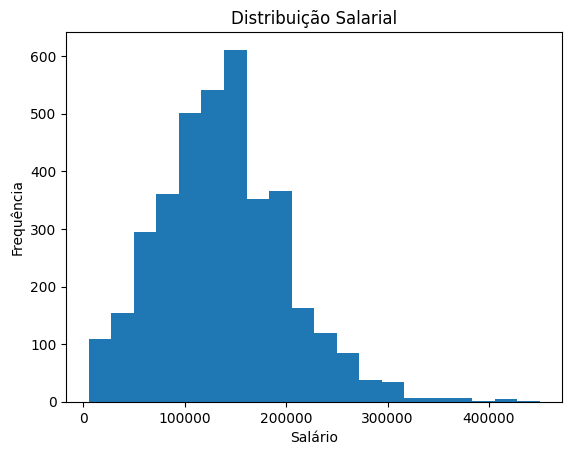

In [52]:
import matplotlib.pyplot as plt

plt.hist(df['salary_in_usd'], bins=20)
plt.title('Distribuição Salarial')
plt.xlabel('Salário')
plt.ylabel('Frequência')
plt.show()

Estamos observando que temos um grande desvio entre o valor máximo dos dados e sua mediana, o que pode acender um alerta de outlier

Vamos tentar entender essa variação por nível de experiência?

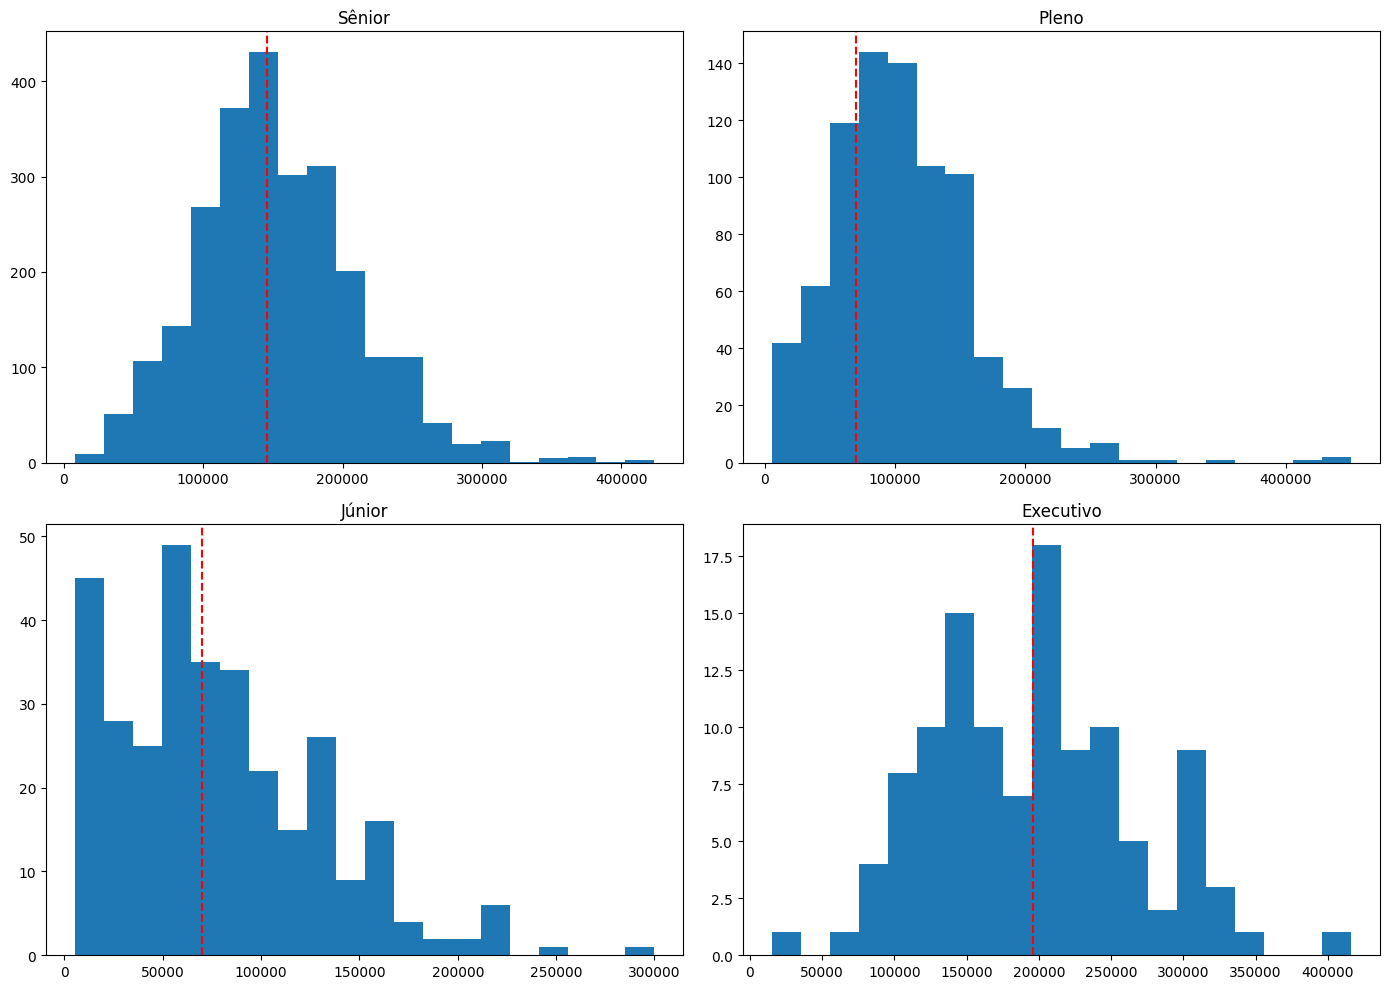

In [62]:
fig,axs = plt.subplots(2,2,figsize=(14, 10))

mediana_senior = df[df['experience_level'] == 'Senior']['salary_in_usd'].median()

axs[0,0].hist(df[df['experience_level'] == 'Senior']['salary_in_usd'], bins=20)
axs[0,0].axvline(mediana_senior, color='red', linestyle='--', label=mediana_senior)
axs[0,0].set_title('Sênior')

mediana_junior = df[df['experience_level'] == 'Entry']['salary_in_usd'].median()
axs[0,1].hist(df[df['experience_level'] == 'Mid']['salary_in_usd'], bins=20)
axs[0,1].axvline(mediana_junior, color='red', linestyle='--', label=mediana_junior)
axs[0,1].set_title('Pleno')

mediana_pleno = df[df['experience_level'] == 'Entry']['salary_in_usd'].median()
axs[1,0].hist(df[df['experience_level'] == 'Entry']['salary_in_usd'], bins=20)
axs[1,0].axvline(mediana_pleno, color='red', linestyle='--', label=mediana_pleno)
axs[1,0].set_title('Júnior')

mediana_executivo = df[df['experience_level'] == 'Executive']['salary_in_usd'].median()
axs[1,1].hist(df[df['experience_level'] == 'Executive']['salary_in_usd'], bins=20)
axs[1,1].axvline(mediana_executivo, color='red', linestyle='--', label=mediana_executivo)
axs[1,1].set_title('Executivo')

plt.tight_layout()
plt.show()

Uma análise semelhante temos com o boxplot abaixo:

<ipython-input-53-e38f412e8d63>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='experience_level', y='salary_in_usd', palette='Set2')


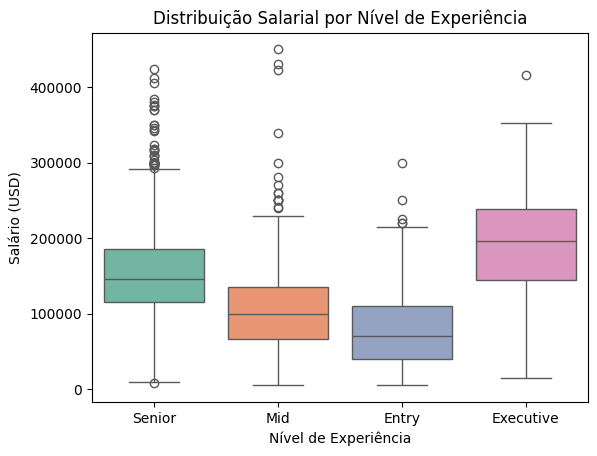

In [53]:
import seaborn as sns

sns.boxplot(data=df, x='experience_level', y='salary_in_usd', palette='Set2')
plt.title('Distribuição Salarial por Nível de Experiência')
plt.xlabel('Nível de Experiência')
plt.ylabel('Salário (USD)')
plt.show()

### Vamos agora entender a relação entre salários e países?

Aqui vamos conseguir realizar o entendimento de quais países estão os maiores salários. E para termos a melhor relação possível, vamos separa por nível de experiência.

In [74]:
entry_level = df[df['experience_level'] == 'Entry'].groupby('company_location')['salary_in_usd'].median().sort_values(ascending=False).head(10)
mid_level = df[df['experience_level'] == 'Mid'].groupby('company_location')['salary_in_usd'].median().sort_values(ascending=False).head(10)
senior_level = df[df['experience_level'] == 'Senior'].groupby('company_location')['salary_in_usd'].median().sort_values(ascending=False).head(10)
executive_level = df[df['experience_level'] == 'Executive'].groupby('company_location')['salary_in_usd'].median().sort_values(ascending=False).head(10)


In [82]:
entry_level

,salary_in_usd
company_location,
BA,120000.0
SE,105000.0
CN,100000.0
IR,100000.0
IQ,100000.0
DZ,100000.0
US,92700.0
BE,68030.5
SG,66970.0


In [83]:
mid_level

,salary_in_usd
company_location,
US,124000.0
IL,119059.0
AE,115000.0
CH,112549.5
LT,94812.0
HR,91142.5
BE,88654.0
IE,88529.5
KE,80000.0


In [84]:
senior_level

,salary_in_usd
company_location,
IL,423834.0
JP,214000.0
NG,200000.0
PR,167500.0
US,150000.0
CA,140000.0
AU,133766.0
NZ,125000.0
DE,123405.0


In [85]:
executive_level

,salary_in_usd
company_location,
US,200000.0
PL,153667.0
GB,143877.5
DE,135936.0
CA,120599.0
RU,106000.0
NL,84053.0
IN,76309.0
ES,74787.0


Então, separei meus dados em níveis de experiência, agrupei por países com as maiores médias e agora, conseguimos criar gráficos de barra.

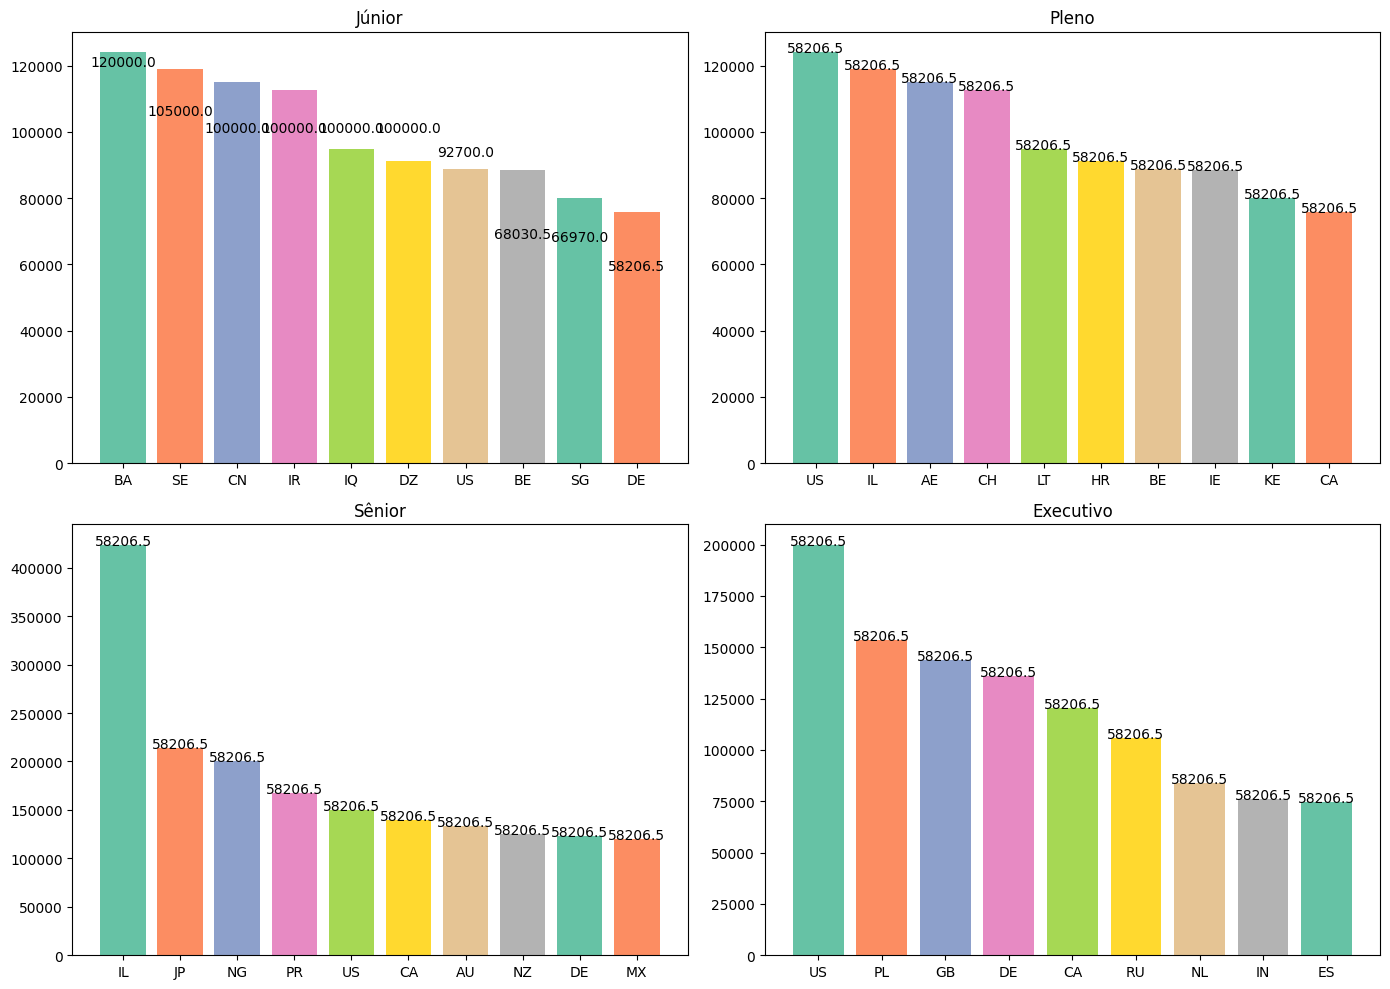

In [81]:
fig,axs = plt.subplots(2,2,figsize=(14, 10))

axs[0,0].bar(x=entry_level.index, height=mid_level.values, color=plt.get_cmap('Set2').colors)
axs[0,0].set_title('Júnior')
for i, valor_1 in enumerate(entry_level.values):
    axs[0,0].text(i, valor_1 + 0.5, str(round(valor_1,2)), ha='center')

axs[0,1].bar(x=mid_level.index, height=mid_level.values, color=plt.get_cmap('Set2').colors)
axs[0,1].set_title('Pleno')
for i, valor_2 in enumerate(mid_level.values):
    axs[0,1].text(i, valor_2 + 0.5, str(round(valor_1,2)), ha='center')

axs[1,0].bar(x=senior_level.index, height=senior_level.values, color=plt.get_cmap('Set2').colors)
axs[1,0].set_title('Sênior')
for i, valor_3 in enumerate(senior_level.values):
    axs[1,0].text(i, valor_3 + 0.5, str(round(valor_1,2)), ha='center')

axs[1,1].bar(x=executive_level.index, height=executive_level.values, color=plt.get_cmap('Set2').colors)
axs[1,1].set_title('Executivo')
for i, valor_4 in enumerate(executive_level.values):
    axs[1,1].text(i, valor_4 + 0.5, str(round(valor_1,2)), ha='center')

plt.tight_layout()
plt.show()

## Por fim, vamos analisar tendencias e correlações


In [86]:
variáveis_de_estudo = df[['salary_in_usd','work_year','years_of_experience']]

Nossa matriz é:

In [87]:
matriz = variáveis_de_estudo.corr()
matriz

,salary_in_usd,work_year,years_of_experience
salary_in_usd,1.000000,0.228290,0.410723
work_year,0.228290,1.000000,0.178878
years_of_experience,0.410723,0.178878,1.000000


Vamos agora estudar nosso heatmap e avaliar se temos correlações:

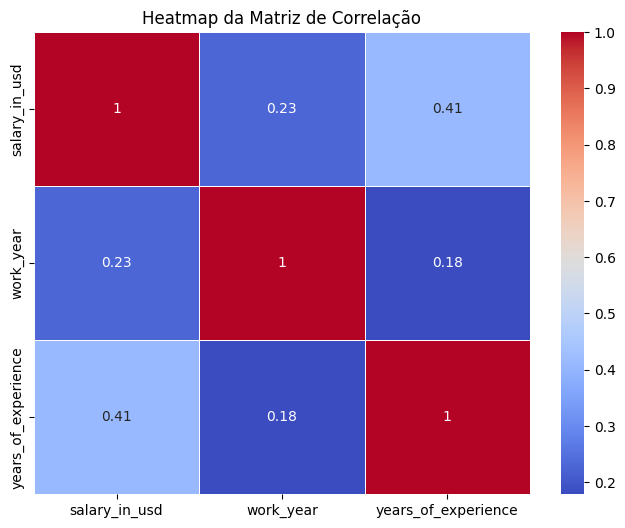

In [88]:
plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap da Matriz de Correlação')
plt.show()

Bom, a maior correlação que possuímos é entre as variáveis anos de experiência e salário.

Vamos agora estudar se temos tendência do aumento de salário nos anos.

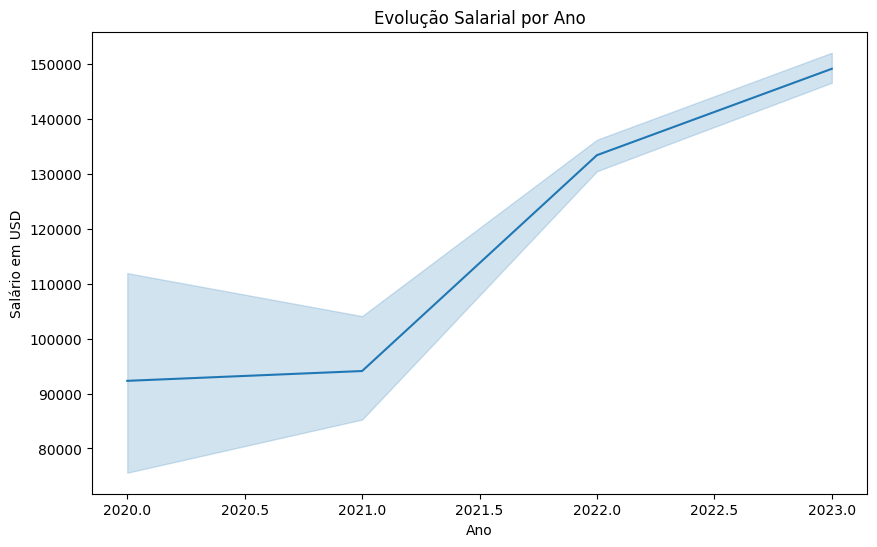

In [100]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['work_year'], y=df['salary_in_usd'])
plt.title('Evolução Salarial por Ano')
plt.xlabel('Ano')
plt.ylabel('Salário em USD')
plt.show()

Então sim, temos um aumento do salário durante os anos.

Por fim, vamos realizar mais uma plotagem sobre anos de experiência e salário

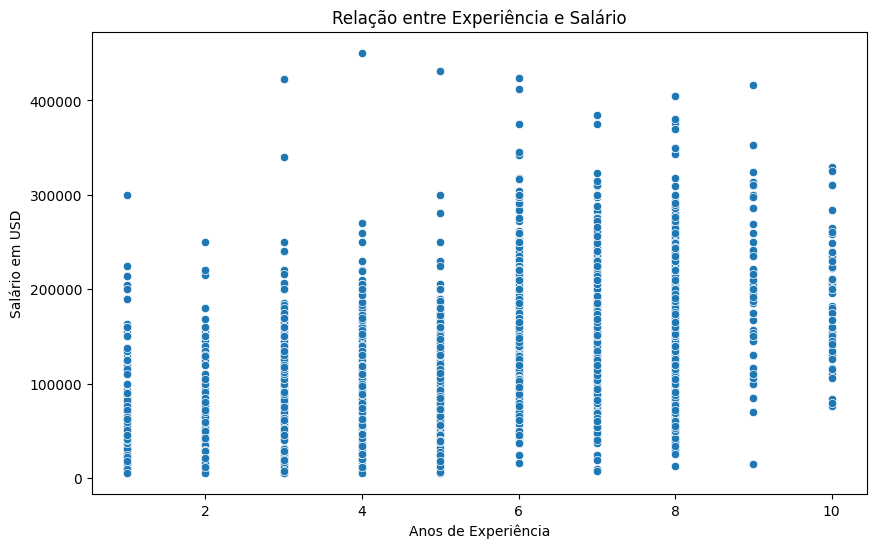

In [97]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['years_of_experience'], y=df['salary_in_usd'])
plt.title('Relação entre Experiência e Salário')
plt.xlabel('Anos de Experiência')
plt.ylabel('Salário em USD')
plt.show()

Ela confirma uma relação positiva moderada entre essas duas variáveis